In [1]:
!pip install imblearn

In [2]:
import os
import pdb

import numpy as np
import pandas as pd
from sklearn import preprocessing


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [4]:
from src.features_generation import feature_engineering

In [5]:
X, y, X_sub, sample_submission = feature_engineering()

In [6]:
X.fillna(-999, inplace=True)

In [7]:
y.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_sample(X, y)

In [9]:
y_sm.value_counts()

1    569877
0    569877
Name: isFraud, dtype: int64

In [12]:
from tensorflow.keras.utils import to_categorical

In [69]:
y_sm[:5]

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [13]:
y_cat = to_categorical(y_sm)
#arg 0: true
#arg 1: fraud

In [68]:
y_cat[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_cat, test_size=0.2, random_state=42)

In [51]:
np.argmax(y_train, axis =1).sum() #num of fraud in training data

455854

In [52]:
np.argmax(y_test, axis =1).sum()

114023

In [61]:
len(y_train)

911803

In [60]:
len(y_pred)

227951

In [19]:
X_train.shape

(911803, 286)

In [40]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=286))
#model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(32, activation='relu'))
#
model.add(Dense(2, activation='softmax'))
model.summary()

# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data= (X_test,y_test), epochs=10, batch_size=100)
#, verbose=0

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               36736     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 45,122
Trainable params: 45,122
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
9119/9119 [==============================] - 20s 2ms/step - loss: 25.7138 - accuracy: 0.6675 - val_loss: 0.5697 - val_accuracy: 0.7151
Epoch 2/10
9119/9119 [==============================] - 21s 2ms/step - loss: 0.5528 - accuracy: 0.7318 - val_loss: 0.5379 - val_accuracy: 0.7470
Epoch 3/10
9119/9119 [==============================] - 21s 2ms/step - loss: 0.5339 - acc

In [22]:
model.save('1st_model') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: 1st_model/assets


In [23]:
from sklearn.metrics import f1_score

In [76]:
y_pred = model.predict(X_test)

In [77]:
y_pred_class = np.argmax(y_pred, axis =1)
y_test_class = np.argmax(y_test, axis =1)
f1_score(y_test_class, y_pred_class)

0.771931153888411

In [78]:
y_pred_class.sum()

149928

In [79]:
y_test_class.sum()

114023

In [80]:
y_pred[:5]

array([[8.5652983e-01, 1.4347014e-01],
       [3.9662263e-01, 6.0337740e-01],
       [3.8138205e-06, 9.9999619e-01],
       [3.9662263e-01, 6.0337740e-01],
       [5.9457356e-01, 4.0542644e-01]], dtype=float32)

In [81]:
y_test[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [82]:
y_test_class #mark "1" is fraud

array([0, 0, 1, ..., 0, 1, 0])

In [83]:
import matplotlib.pyplot as plt
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)


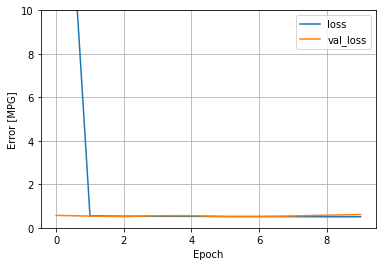

In [84]:
plot_loss(history)